<a href="https://colab.research.google.com/github/ChinarVyas/Car_price-prediction/blob/main/Cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib
%matplotlib inline
import sklearn
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV,cross_val_score,ShuffleSplit,GridSearchCV
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,HistGradientBoostingRegressor,RandomForestRegressor,StackingRegressor,VotingRegressor

In [2]:
cars= pd.read_csv(r'/content/drive/MyDrive/Data Analysis/Data/CarsData.csv')

In [3]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3 Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [4]:
for col in cars.columns:
    cars[col] = cars[col].apply(lambda x: x.replace(" ", "") if isinstance(x, str) else x)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         97712 non-null  object 
 1   year          97712 non-null  int64  
 2   price         97712 non-null  int64  
 3   transmission  97712 non-null  object 
 4   mileage       97712 non-null  int64  
 5   fuelType      97712 non-null  object 
 6   tax           97712 non-null  int64  
 7   mpg           97712 non-null  float64
 8   engineSize    97712 non-null  float64
 9   Manufacturer  97712 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 7.5+ MB


In [6]:
cars.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
Manufacturer    0
dtype: int64

In [7]:
for i in cars.columns:
    print(cars[i].value_counts())
    print("\n")

Fiesta            6509
Golf              4797
Focus             4555
CClass            3694
Corsa             3285
                  ... 
TransitTourneo       1
Escort               1
200                  1
Ranger               1
220                  1
Name: model, Length: 195, dtype: int64


2019    26165
2017    21616
2016    15724
2018    13570
2015     7586
2014     4053
2020     4040
2013     2590
2012      633
2011      432
2010      340
2009      277
2008      199
2007      163
2006       86
2005       69
2004       52
2003       34
2002       31
2001       20
2000        9
1998        8
1999        6
1997        4
1996        2
1970        2
2024        1
Name: year, dtype: int64


9995     585
8995     490
10995    469
12995    442
7995     428
        ... 
17602      1
15429      1
1888       1
55156      1
18217      1
Name: price, Length: 13236, dtype: int64


Manual       55502
Semi-Auto    22296
Automatic    19905
Other            9
Name: transmission, dtype: int64


10  

In [8]:
duplicates= cars.duplicated()
cars = cars.drop_duplicates()

In [9]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,YetiOutdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


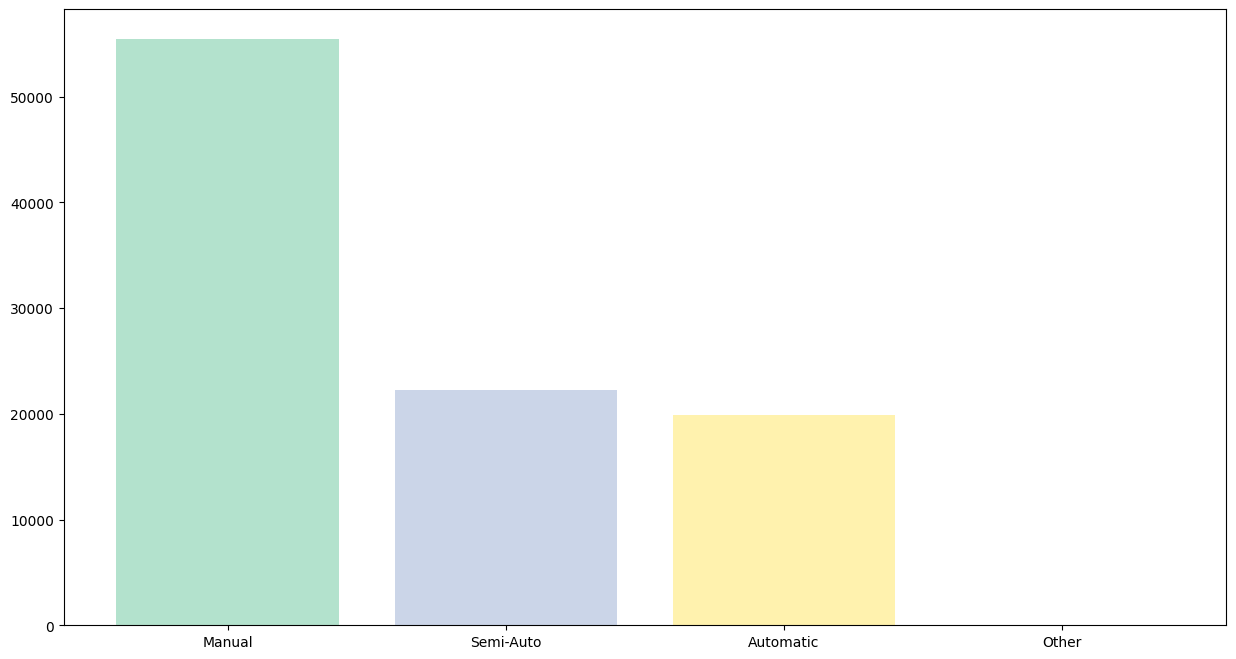

In [10]:
counts = cars['transmission'].value_counts()
plt.figure(figsize=(15,8))
colors = cm.Pastel2(np.linspace(0, 1, len(counts)))
plt.bar(x=counts.index, height=counts.values,color= colors)
plt.show();

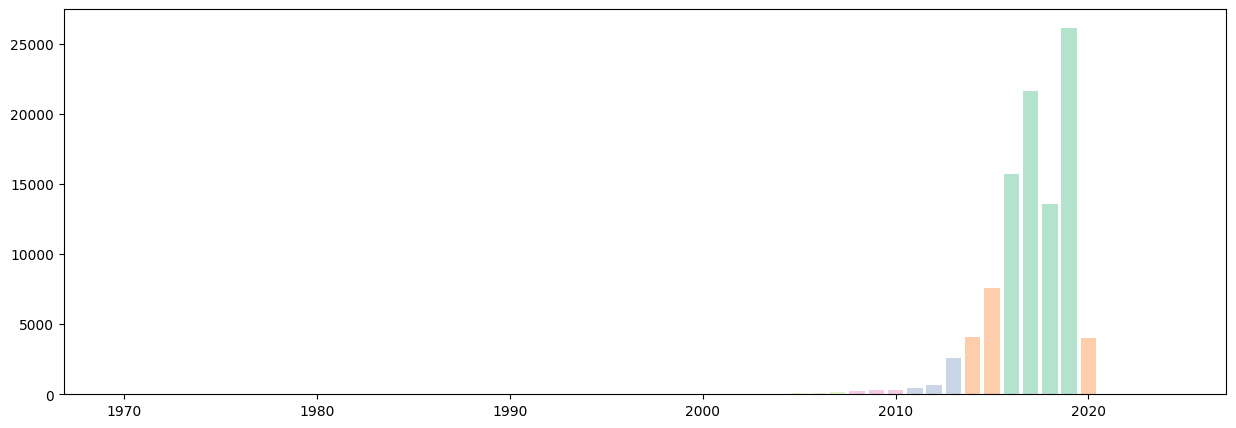

In [11]:
counts = cars['year'].value_counts()
plt.figure(figsize=(15,5))
colors=cm.Pastel2(np.linspace(0,1, len(counts)))
plt.bar(x=counts.index, height=counts.values,color=colors)
plt.show()

In [12]:
grouped_data = cars.groupby(['year','transmission']).size().unstack()
grouped_data

transmission,Automatic,Manual,Other,Semi-Auto
year,,,,
1970,1.0,1.0,NaN,NaN
1996,1.0,1.0,NaN,NaN
1997,2.0,2.0,NaN,NaN
1998,5.0,3.0,NaN,NaN
1999,3.0,3.0,NaN,NaN
2000,6.0,3.0,NaN,NaN
2001,12.0,7.0,NaN,1.0
2002,15.0,15.0,NaN,1.0
2003,15.0,19.0,NaN,NaN


trying to understand the year of the model and the types of transmission in the data by grouping them.

will also work on fuel types and transmission types

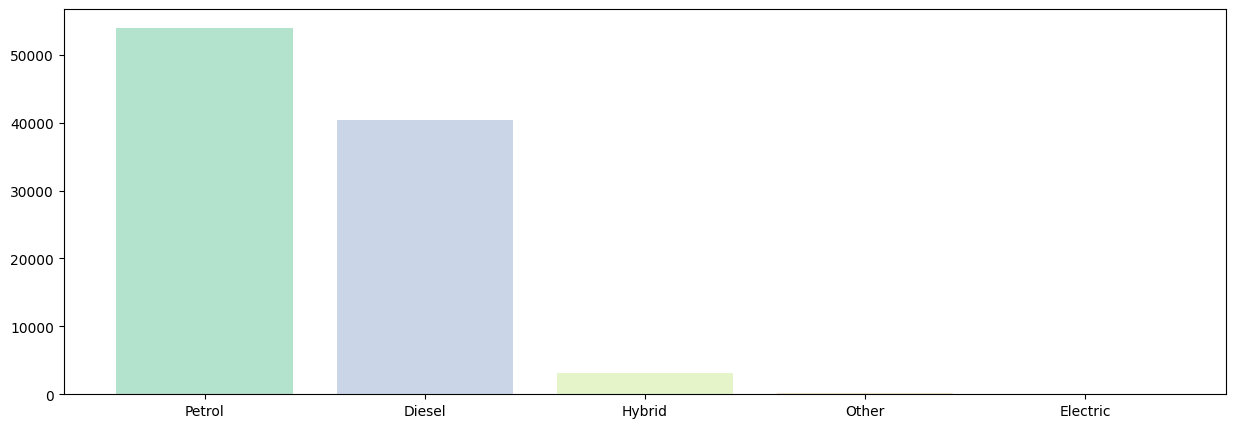

In [13]:
counts= cars["fuelType"].value_counts()
plt.figure(figsize=(15,5))
colors= cm.Pastel2(np.linspace(0,1, len(counts)))
plt.bar(x=counts.index, height= counts.values, color= colors)
plt.show()

In [14]:
cars.fuelType.value_counts()

Petrol      53982
Diesel      40419
Hybrid       3059
Other         246
Electric        6
Name: fuelType, dtype: int64

In [15]:
grouped_fuel=cars.groupby(['fuelType','transmission']).size().unstack()
grouped_fuel

transmission,Automatic,Manual,Other,Semi-Auto
fuelType,,,,
Diesel,10315.0,17616.0,2.0,12486.0
Electric,6.0,NaN,NaN,NaN
Hybrid,2689.0,26.0,2.0,342.0
Other,212.0,32.0,1.0,1.0
Petrol,6683.0,37828.0,4.0,9467.0


will also analyse the manufacturers and its fuel and transmission types

In [16]:
cars.Manufacturer.value_counts()

ford          17811
volkswagen    14893
vauxhall      13258
merc          12860
BMW           10664
Audi          10565
toyota         6699
skoda          6188
hyundi         4774
Name: Manufacturer, dtype: int64

In [17]:
grouped_make=cars.groupby(['Manufacturer','transmission','fuelType']).size().unstack()
grouped_make

fuelType                   Diesel  Electric  Hybrid  Other   Petrol
Manufacturer transmission                                          
Audi         Automatic     1650.0       NaN    12.0    NaN   1018.0
             Manual        2101.0       NaN     NaN    NaN   2216.0
             Semi-Auto     1786.0       NaN    16.0    NaN   1766.0
BMW          Automatic     2470.0       3.0   191.0   36.0    842.0
             Manual        1622.0       NaN     NaN    NaN    863.0
             Semi-Auto     2896.0       NaN   106.0    NaN   1635.0
ford         Automatic      561.0       2.0    19.0    1.0    771.0
             Manual        4647.0       NaN     1.0    NaN  10734.0
             Semi-Auto      498.0       NaN     2.0    NaN    575.0
hyundi       Automatic      218.0       NaN   277.0    1.0    162.0
             Manual        1058.0       NaN    21.0    NaN   2467.0
             Other            NaN       NaN     1.0    NaN      1.0
             Semi-Auto      319.0       NaN    41.0    NaN    208.0
merc         Automatic     3473.0       NaN   104.0    6.0   1214.0
             Manual         930.0       NaN     NaN    NaN    490.0
             Other            1.0       NaN     NaN    1.0      NaN
             Semi-Auto     4630.0       NaN    66.0    NaN   1945.0
skoda        Automatic      485.0       NaN     2.0    6.0    607.0
             Manual        1111.0       NaN     NaN    3.0   2579.0
             Other            NaN       NaN     NaN    NaN      1.0
             Semi-Auto      450.0       NaN    16.0    NaN    928.0
toyota       Automatic       96.0       NaN  2035.0  100.0    420.0
             Manual         372.0       NaN     4.0    5.0   3412.0
             Other            NaN       NaN     1.0    NaN      NaN
             Semi-Auto       28.0       NaN     NaN    NaN    226.0
vauxhall     Automatic      318.0       1.0     2.0    NaN    860.0
             Manual        2391.0       NaN     NaN    1.0   9218.0
             Other            1.0       NaN     NaN    NaN      2.0
             Semi-Auto       56.0       NaN     NaN    NaN    408.0
volkswagen   Automatic     1044.0       NaN    47.0   62.0    789.0
             Manual        3384.0       NaN     NaN   23.0   5849.0
             Semi-Auto     1823.0       NaN    95.0    1.0   1776.0

after working on the manufacturer and its transmission and fuel types lets move on understanding the engine size and manufacturer and fuel types

In [18]:
ca1=cars["engineSize"].mean()
cars["engineSize"].replace(0.0,ca1, inplace=True)

In [19]:
grouped_engine = cars.groupby(["engineSize",'fuelType']).size().unstack()
print(grouped_engine)

fuelType     Diesel  Electric  Hybrid  Other   Petrol
engineSize                                           
0.600000        NaN       NaN     NaN    7.0      NaN
1.000000        3.0       1.0     NaN   81.0  16998.0
1.100000        1.0       NaN     NaN    NaN    557.0
1.200000       57.0       NaN     NaN    8.0   6653.0
1.300000       39.0       NaN     3.0    2.0   1263.0
1.400000      211.0       1.0   155.0   11.0  10515.0
1.500000     4456.0       NaN   630.0   27.0   6134.0
1.600000     5543.0       NaN   338.0    2.0   2817.0
1.664913       69.0       2.0    38.0    1.0    158.0
1.700000      904.0       NaN     NaN    NaN      3.0
1.800000       90.0       NaN  1158.0   27.0    440.0
1.900000       22.0       NaN     NaN    NaN      5.0
2.000000    20120.0       2.0   430.0   73.0   6261.0
2.100000     3926.0       NaN    44.0    NaN      NaN
2.200000      458.0       NaN     1.0    NaN      7.0
2.300000       55.0       NaN     NaN    NaN     90.0
2.400000       70.0       Na

In [20]:
grouped_manufacturer = cars.groupby(["engineSize",'Manufacturer']).size().unstack()
grouped_manufacturer

Manufacturer,Audi,BMW,ford,hyundi,merc,skoda,toyota,vauxhall,volkswagen
engineSize,,,,,,,,,
0.600000,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.000000,550.0,1.0,7701.0,1045.0,NaN,1903.0,2038.0,799.0,3046.0
1.100000,NaN,NaN,550.0,7.0,NaN,NaN,NaN,1.0,NaN
1.200000,31.0,NaN,1613.0,786.0,NaN,947.0,300.0,1744.0,1297.0
1.300000,NaN,NaN,12.0,2.0,653.0,NaN,600.0,40.0,NaN
1.400000,1589.0,NaN,112.0,310.0,1.0,418.0,40.0,6904.0,1519.0
1.500000,718.0,1426.0,3393.0,NaN,1648.0,619.0,1419.0,601.0,1423.0
1.600000,908.0,108.0,918.0,1247.0,836.0,662.0,166.0,2266.0,1589.0
1.664913,52.0,47.0,51.0,47.0,12.0,5.0,6.0,33.0,15.0


In the above 2 tables we see that we have around 268 units with engine 0.0 so this is probably the data wasnt available or was missed. however in real life there are no vehicles with engine size of 0.0 and the min average engine size is 1.0-1.2 Litre engine

In [21]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,YetiOutdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,Automatic,8337,Petrol,145,54.3,1.0,ford
97708,3Series,2014,14995,Manual,25372,Diesel,30,61.4,2.0,BMW
97709,Fiesta,2017,8950,Manual,19910,Petrol,125,54.3,1.2,ford
97710,Astra,2017,10700,Automatic,24468,Petrol,125,50.4,1.4,vauxhall


In [22]:
grouped_engine = cars.groupby(["engineSize",'fuelType']).size().unstack()
print(grouped_engine)

fuelType     Diesel  Electric  Hybrid  Other   Petrol
engineSize                                           
0.600000        NaN       NaN     NaN    7.0      NaN
1.000000        3.0       1.0     NaN   81.0  16998.0
1.100000        1.0       NaN     NaN    NaN    557.0
1.200000       57.0       NaN     NaN    8.0   6653.0
1.300000       39.0       NaN     3.0    2.0   1263.0
1.400000      211.0       1.0   155.0   11.0  10515.0
1.500000     4456.0       NaN   630.0   27.0   6134.0
1.600000     5543.0       NaN   338.0    2.0   2817.0
1.664913       69.0       2.0    38.0    1.0    158.0
1.700000      904.0       NaN     NaN    NaN      3.0
1.800000       90.0       NaN  1158.0   27.0    440.0
1.900000       22.0       NaN     NaN    NaN      5.0
2.000000    20120.0       2.0   430.0   73.0   6261.0
2.100000     3926.0       NaN    44.0    NaN      NaN
2.200000      458.0       NaN     1.0    NaN      7.0
2.300000       55.0       NaN     NaN    NaN     90.0
2.400000       70.0       Na

In [23]:
le=LabelEncoder()

cars['transmission']=le.fit_transform(cars['transmission'])
cars['fuelType']=le.fit_transform(cars['fuelType'])
cars['Manufacturer']=le.fit_transform(cars['Manufacturer'])

In [24]:
cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,1,11630,4,145,60.1,1.0,3
1,Polo,2017,10989,1,9200,4,145,58.9,1.0,8
2,2Series,2019,27990,3,1614,0,145,49.6,2.0,1
3,YetiOutdoor,2017,12495,1,30960,0,150,62.8,2.0,5
4,Fiesta,2017,7999,1,19353,4,125,54.3,1.2,2
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,0,8337,4,145,54.3,1.0,2
97708,3Series,2014,14995,1,25372,0,30,61.4,2.0,1
97709,Fiesta,2017,8950,1,19910,4,125,54.3,1.2,2
97710,Astra,2017,10700,0,24468,4,125,50.4,1.4,7


In [25]:
z = np.abs(zscore(cars[['price']]))
threshold = 3
df = cars[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ",cars.shape)
print ("Shape of the dataframe after removing outliers: ", df.shape)
print ("Percentage of data loss post outlier removal: ", (cars.shape[0]-df.shape[0])/cars.shape[0]*100)

Shape of the dataframe before removing outliers:  (97712, 10)
Shape of the dataframe after removing outliers:  (95964, 10)
Percentage of data loss post outlier removal:  1.7889307352218764


In [26]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,1,11630,4,145,60.1,1.0,3
1,Polo,2017,10989,1,9200,4,145,58.9,1.0,8
2,2Series,2019,27990,3,1614,0,145,49.6,2.0,1
3,YetiOutdoor,2017,12495,1,30960,0,150,62.8,2.0,5
4,Fiesta,2017,7999,1,19353,4,125,54.3,1.2,2
...,...,...,...,...,...,...,...,...,...,...
97707,Fiesta,2017,10447,0,8337,4,145,54.3,1.0,2
97708,3Series,2014,14995,1,25372,0,30,61.4,2.0,1
97709,Fiesta,2017,8950,1,19910,4,125,54.3,1.2,2
97710,Astra,2017,10700,0,24468,4,125,50.4,1.4,7


In [27]:
cars=df.drop(columns={"model"})

In [28]:
X = cars.drop(columns=['price'],axis=1)
y=cars['price']

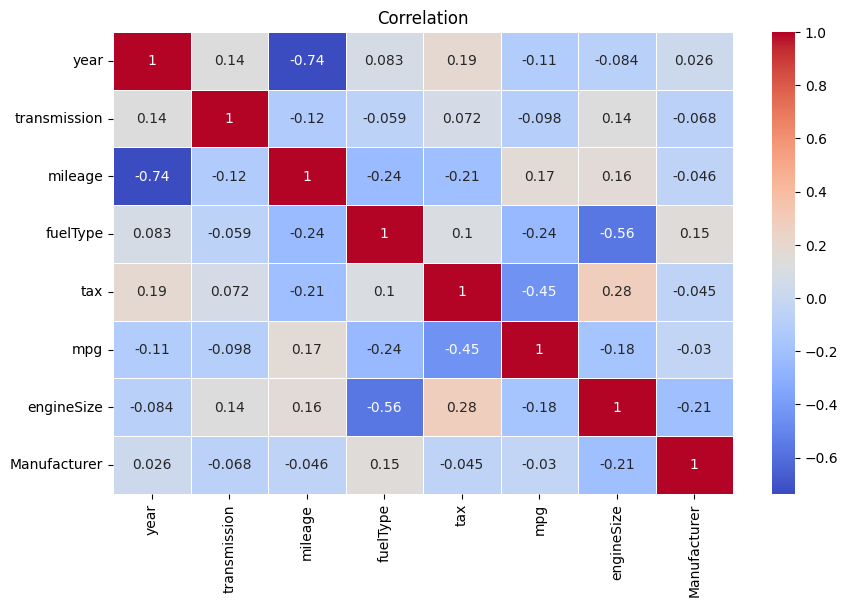

In [29]:
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation")
plt.show();

we see that the mileage is negatively impacting the years. which is understood as the years of vehicle increases the mileage gets reduced due to the wear and tear of the engine

Standardization & Normalization of the data
---

In [30]:
sc= StandardScaler()

In [31]:
x=sc.fit_transform(X)

In [32]:
x

array([[-0.01531692, -0.24011307, -0.56393663, ...,  0.28363942,
        -1.26231711, -0.39393745],
       [-0.01531692, -0.24011307, -0.67909097, ...,  0.20851611,
        -1.26231711,  1.43491356],
       [ 0.9284215 ,  1.73310128, -1.03858104, ..., -0.3736896 ,
         0.70327995, -1.12547786],
       ...,
       [-0.01531692, -0.24011307, -0.17155885, ..., -0.07945661,
        -0.8691977 , -0.75970765],
       [-0.01531692, -1.22672024,  0.04443847, ..., -0.32360739,
        -0.47607828,  1.06914336],
       [ 0.9284215 , -0.24011307, -0.61341035, ..., -0.43003209,
        -0.27951858,  1.06914336]])

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [34]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(67174, 8)
(28790, 8)
(67174,)
(28790,)


In [35]:
models= {"LR":LinearRegression(),
         "DT":DecisionTreeRegressor(),
         "ET":ExtraTreeRegressor(),
         "ADR":AdaBoostRegressor(),
         "GBR":GradientBoostingRegressor(),
         "HGB":HistGradientBoostingRegressor(),
         "RF":RandomForestRegressor(),
         }

In [36]:
Model=[]
R_squared=[]
MSE=[]
Mean_Score=[]
std_dev=[]
for i in models:
    mod=models[i]
    model=mod.fit(xtrain,ytrain)
    pred=model.predict(xtest)

    r2 = r2_score(ytest, pred)
    Model.append(i)
    print(f"{i}:-R^2 score: {r2:.3f}")
    R_squared.append(r2)


    mse = mean_squared_error(ytest, pred)
    rounded_mse = round(mse, 2)
    print(f"{i}:-Mean_Squared_Error: {rounded_mse:.2f}")
    MSE.append(rounded_mse)

    scores = cross_val_score(model, x, y, cv=10, scoring='neg_root_mean_squared_error')
    print(f"Mean score of {scores.mean():.2f} with a standard deviation of {scores.std():.2f}")
    Mean_Score.append(scores.mean())
    std_dev.append(scores.std())

LR:-R^2 score: 0.732
LR:-Mean_Squared_Error: 17261848.41
Mean score of -4158.99 with a standard deviation of 57.34
DT:-R^2 score: 0.908
DT:-Mean_Squared_Error: 5911074.31
Mean score of -2407.83 with a standard deviation of 42.87
ET:-R^2 score: 0.902
ET:-Mean_Squared_Error: 6292595.76
Mean score of -2468.59 with a standard deviation of 54.95
ADR:-R^2 score: 0.649
ADR:-Mean_Squared_Error: 22615360.95
Mean score of -4900.94 with a standard deviation of 154.79
GBR:-R^2 score: 0.890
GBR:-Mean_Squared_Error: 7082104.53
Mean score of -2672.48 with a standard deviation of 25.95
HGB:-R^2 score: 0.932
HGB:-Mean_Squared_Error: 4405860.37
Mean score of -2118.45 with a standard deviation of 20.82
RF:-R^2 score: 0.945
RF:-Mean_Squared_Error: 3571186.93
Mean score of -1884.81 with a standard deviation of 29.47


In [37]:
car_final={"Models":Model,
           "Rsquares":R_squared,
           "Mean_Squared_Errors":MSE,
           "Mean_Scores":Mean_Score,
           "Standard Deviation":std_dev
}

In [38]:
totalscores=pd.DataFrame(car_final)

In [39]:
totalscores.sort_values("Rsquares",ascending=False,ignore_index= True)

,Models,Rsquares,Mean_Squared_Errors,Mean_Scores,Standard Deviation
0,RF,0.944581,3571186.93,-1884.811162,29.474440
1,HGB,0.931629,4405860.37,-2118.452951,20.818728
2,DT,0.908270,5911074.31,-2407.828627,42.866171
3,ET,0.902350,6292595.76,-2468.589036,54.947503
4,GBR,0.890098,7082104.53,-2672.477468,25.949071
5,LR,0.732126,17261848.41,-4158.991176,57.344744
6,ADR,0.649049,22615360.95,-4900.941338,154.789966


on the basis of the Rsquare and MSE and Cross validation scores we see that Random forest,HistGradientBoostingRegressor and DecisionTreeRegressor are very performing models

lets work on Hyper parameter tunning of these models

HyperParameter Tunning
---

In [40]:
params={'n_estimators':[10,20],
        'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'max_depth':[1,10,15]}
k_fold_cv = 3

In [41]:
rfr=RandomForestRegressor()
mod1=GridSearchCV(rfr,param_grid=params,cv=k_fold_cv,scoring='r2',error_score='raise')
mod1.fit(xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [1, 10, 15], 'n_estimators': [10, 20]},
             scoring='r2')

In [42]:
print(mod1.best_estimator_)
print(mod1.best_params_)
print(mod1.best_score_)

RandomForestRegressor(criterion='friedman_mse', max_depth=15, n_estimators=20)
{'criterion': 'friedman_mse', 'max_depth': 15, 'n_estimators': 20}
0.9385852303081187


In [44]:
rfr=RandomForestRegressor(criterion= 'friedman_mse', max_depth= 15, n_estimators= 20)
rfr.fit(xtrain,ytrain)
finmod1=rfr.predict(xtest)

In [45]:
score=cross_val_score(rfr,x,y,cv=10,n_jobs=-3)
meanscore1=score.mean()

In [54]:
print(r2_score(ytest,finmod1))
print(meanscore1)

0.9449854495910102
0.9244021127267169


Decision Tree Regressor

In [46]:
params={ 'criterion':['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'splitter' : ['best', 'random'],
        'max_depth':[17,28,35]}

In [47]:
mod2=GridSearchCV(DecisionTreeRegressor(),param_grid=params,cv=3,scoring='r2',error_score='raise')
mod2.fit(xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'friedman_mse', 'poisson'],
                         'max_depth': [17, 28, 35],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [48]:
print(mod2.best_estimator_)
print(mod2.best_params_)
print(mod2.best_score_)

DecisionTreeRegressor(max_depth=17)
{'criterion': 'squared_error', 'max_depth': 17, 'splitter': 'best'}
0.9075204141173389


In [49]:
dt=DecisionTreeRegressor(criterion= 'squared_error', max_depth= 17, splitter = 'best')
dt.fit(xtrain,ytrain)
finmod2=dt.predict(xtest)

In [55]:
score=cross_val_score(dt,x,y,cv=10,n_jobs=-3)
meanscore2=score.mean()

In [57]:
print(r2_score(ytest,finmod2))
print(meanscore2)

0.9218554876062597
0.9251148938889535


HistGradientBoostingRegressor
----

In [66]:
params={ 'loss':['squared_error', 'absolute_error','poisson'],
        'learning_rate':[0.1,0.001,0.075],
        'max_leaf_nodes':[17,28,35,95]}

In [67]:
mod3=GridSearchCV(HistGradientBoostingRegressor(),param_grid=params,cv=3,scoring='r2',error_score='raise')
mod3.fit(xtrain,ytrain)

GridSearchCV(cv=3, error_score='raise',
             estimator=HistGradientBoostingRegressor(),
             param_grid={'learning_rate': [0.1, 0.001, 0.075],
                         'loss': ['squared_error', 'absolute_error', 'poisson'],
                         'max_leaf_nodes': [17, 28, 35, 95]},
             scoring='r2')

In [68]:
print(mod3.best_estimator_)
print(mod3.best_params_)
print(mod3.best_score_)

HistGradientBoostingRegressor(loss='poisson', max_leaf_nodes=95)
{'learning_rate': 0.1, 'loss': 'poisson', 'max_leaf_nodes': 95}
0.9411252917361178


In [69]:
hgb=HistGradientBoostingRegressor(learning_rate= 0.1, loss = 'poisson', max_leaf_nodes= 95)
hgb.fit(xtrain,ytrain)
finmod3=dt.predict(xtest)

In [70]:
score=cross_val_score(hgb,x,y,cv=10,n_jobs=-3)
meanscore3=score.mean()

In [71]:
print(r2_score(ytest,finmod3))
print(meanscore3)

0.9218554876062597
0.9442180476719131


compared to HistGradient Boosting Regressor I see that Random Forest Regressor is minutely giving better results, hence finalizing on that model as my final model

In [72]:
import joblib
joblib.dump(rfr,'cars.pkl')

['cars.pkl']